# Import packages

In [1]:
# import core packages
import warnings
warnings.filterwarnings("ignore")
from itertools import combinations
import os
import copy 
# import semi-core packages
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
plt.style.use('seaborn-v0_8-poster')
import numpy as np
import pandas as pd
from multiprocessing import Pool

# import open2c libraries
import bioframe
import coolpuppy
from coolpuppy import coolpup, plotpup
import cooler
import cooltools
from cooltools import insulation
import cooltools.lib.plotting
from cooltools.lib import common, checks

from packaging import version
if version.parse(cooltools.__version__) < version.parse('0.5.2'):
    raise AssertionError("tutorial relies on cooltools version 0.5.2 or higher,"+
                         "please check your cooltools version and update to the latest")

# count cpus
num_cpus = os.getenv('SLURM_CPUS_PER_TASK')
if not num_cpus:
    num_cpus = os.cpu_count()
num_cpus = int(num_cpus)
print(num_cpus)

10


In [2]:
figDir = '../figure/TAD'
os.makedirs(figDir, exist_ok=True)
coolDir = "../data/cool_norm_pooled"
outDir = "../data/TAD"
os.makedirs(outDir, exist_ok=True)

In [3]:
clr = cooler.Cooler(os.path.join(coolDir, "G1DMSO_pooled_25000bp_KR.cool"))
tads = pd.read_csv(os.path.join(outDir, "TAD_25kb_125kb_otsu_G1DMSO_pooled.bed"), sep='\t', header=None)
tads.columns = ['chrom', 'start', 'end']
pileup_df_DMSO = coolpup.pileup(clr = clr,
                        features = tads,
                        features_format = 'bed',
                        clr_weight_name = 'weight',
                        min_diag = 2,
                        #mindist = 0,
                        local = True,
                        rescale = True,
                        rescale_size = 99,
                        rescale_flank = 0.5,
                        nproc = 10, seed = 123)

clr = cooler.Cooler(os.path.join(coolDir, "G1dTAG_pooled_25000bp_KR.cool"))
tads = pd.read_csv(os.path.join(outDir, "TAD_25kb_125kb_otsu_G1DMSO_pooled.bed"), sep='\t', header=None)
tads.columns = ['chrom', 'start', 'end']
pileup_df_dTAG = coolpup.pileup(clr = clr,
                        features = tads,
                        features_format = 'bed',
                        clr_weight_name = 'weight',
                        min_diag = 2,
                        #mindist = 0,
                        local = True,
                        rescale = True,
                        rescale_size = 99,
                        rescale_flank = 0.5,
                        nproc = 10, seed = 123)

clr = cooler.Cooler(os.path.join(coolDir, "G1A485_pooled_25000bp_KR.cool"))
tads = pd.read_csv(os.path.join(outDir, "TAD_25kb_125kb_otsu_G1DMSO_pooled.bed"), sep='\t', header=None)
tads.columns = ['chrom', 'start', 'end']
pileup_df_A485 = coolpup.pileup(clr = clr,
                        features = tads,
                        features_format = 'bed',
                        clr_weight_name = 'weight',
                        min_diag = 2,
                        #mindist = 0,
                        local = True,
                        rescale = True,
                        rescale_size = 99,
                        rescale_flank = 0.5,
                        nproc = 10, seed = 123)

clr = cooler.Cooler(os.path.join(coolDir, "GSE178982_AsyncUT_pooled_25000bp_KR.cool"))
tads = pd.read_csv(os.path.join(outDir, "TAD_25kb_125kb_otsu_GSE178982_AsyncUT_pooled.bed"), sep='\t', header=None)
tads.columns = ['chrom', 'start', 'end']
pileup_df_UT = coolpup.pileup(clr = clr,
                        features = tads,
                        features_format = 'bed',
                        clr_weight_name = 'weight',
                        min_diag = 2,
                        #mindist = 0,
                        local = True,
                        rescale = True,
                        rescale_size = 99,
                        rescale_flank = 0.5,
                        nproc = 10, seed = 123)

clr = cooler.Cooler(os.path.join(coolDir, "GSE178982_AsyncAID_pooled_25000bp_KR.cool"))
tads = pd.read_csv(os.path.join(outDir, "TAD_25kb_125kb_otsu_GSE178982_AsyncUT_pooled.bed"), sep='\t', header=None)
tads.columns = ['chrom', 'start', 'end']
pileup_df_AID = coolpup.pileup(clr = clr,
                        features = tads,
                        features_format = 'bed',
                        clr_weight_name = 'weight',
                        min_diag = 2,
                        #mindist = 0,
                        local = True,
                        rescale = True,
                        rescale_size = 99,
                        rescale_flank = 0.5,
                        nproc = 10, seed = 123)

INFO:coolpuppy:Rescaling with rescale_flank = 0.5 to 99x99 pixels
INFO:coolpuppy:('chr8', 'chr8'): 140
INFO:coolpuppy:('chr10', 'chr10'): 177
INFO:coolpuppy:('chr9', 'chr9'): 157
INFO:coolpuppy:('chr7', 'chr7'): 186
INFO:coolpuppy:('chr5', 'chr5'): 171
INFO:coolpuppy:('chr4', 'chr4'): 187
INFO:coolpuppy:('chr6', 'chr6'): 190
INFO:coolpuppy:('chr3', 'chr3'): 180
INFO:coolpuppy:('chr2', 'chr2'): 238
INFO:coolpuppy:('chr17', 'chr17'): 113
INFO:coolpuppy:('chr12', 'chr12'): 141
INFO:coolpuppy:('chr18', 'chr18'): 117
INFO:coolpuppy:('chr16', 'chr16'): 119
INFO:coolpuppy:('chr15', 'chr15'): 133
INFO:coolpuppy:('chr13', 'chr13'): 166
INFO:coolpuppy:('chr19', 'chr19'): 78
INFO:coolpuppy:('chr1', 'chr1'): 231
INFO:coolpuppy:('chr11', 'chr11'): 152
INFO:coolpuppy:('chr14', 'chr14'): 133
INFO:coolpuppy:('chrX', 'chrX'): 177
INFO:coolpuppy:Total number of piled up windows: 3186
INFO:coolpuppy:Rescaling with rescale_flank = 0.5 to 99x99 pixels
INFO:coolpuppy:('chr8', 'chr8'): 140
INFO:coolpuppy:('c

INFO:coolpuppy:Can't use symmetrical scale with linear. Plotting non-symmetrical
INFO:coolpuppy:Can't use symmetrical scale with linear. Plotting non-symmetrical
INFO:coolpuppy:Can't use symmetrical scale with linear. Plotting non-symmetrical
INFO:coolpuppy:Can't use symmetrical scale with linear. Plotting non-symmetrical
INFO:coolpuppy:Can't use symmetrical scale with linear. Plotting non-symmetrical


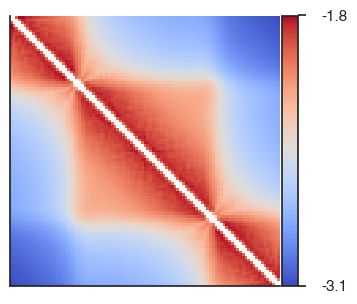

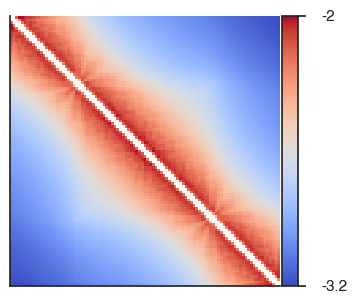

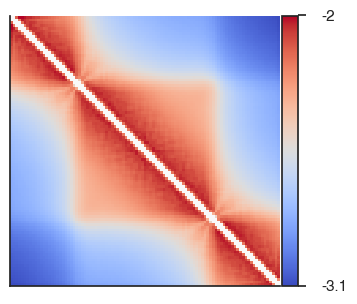

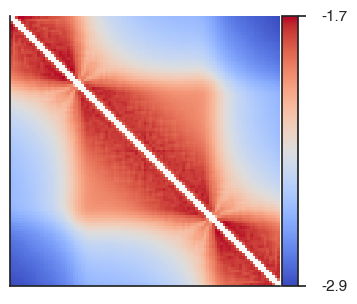

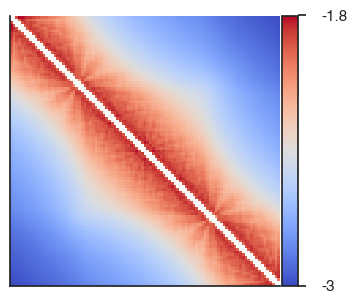

In [4]:
vmax = 2.5
vmin = 0.3
cmap = 'coolwarm'
puptemp = copy.deepcopy(pileup_df_DMSO)
puptemp.data[0] = np.log10(puptemp.data[0])
fg1 = plotpup.plot(puptemp,
                   score = False,
                   cmap = cmap,
                   scale = 'linear', height=4, font = 'Helvetica')

puptemp = copy.deepcopy(pileup_df_dTAG)
puptemp.data[0] = np.log10(puptemp.data[0])
fg2 = plotpup.plot(puptemp,
                   score = False,
                   cmap = cmap,
                   scale = 'linear', height=4, font = 'Helvetica')

puptemp = copy.deepcopy(pileup_df_A485)
puptemp.data[0] = np.log10(puptemp.data[0])
fg3 = plotpup.plot(puptemp,
                   score = False,
                   cmap = cmap,
                   scale = 'linear', height=4, font = 'Helvetica')

puptemp = copy.deepcopy(pileup_df_UT)
puptemp.data[0] = np.log10(puptemp.data[0])
fg4 = plotpup.plot(puptemp,
                   score = False,
                   cmap = cmap,
                   scale = 'linear', height=4, font = 'Helvetica')

puptemp = copy.deepcopy(pileup_df_AID)
puptemp.data[0] = np.log10(puptemp.data[0])
fg5 = plotpup.plot(puptemp,
                   score = False,
                   cmap = cmap,
                   scale = 'linear', height=4, font = 'Helvetica')